In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##data downloaded from github 

In [2]:

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

checking the column names

In [3]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


checking the null values using heatmap, so to check this in values we will use below command

In [5]:
df.shape
#data has 13 columns and 614 rows

(7043, 21)

<AxesSubplot:>

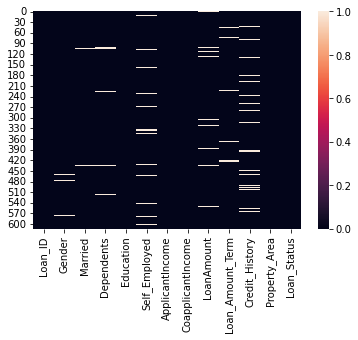

In [6]:
sns.heatmap(df.isnull())

# checking the count of null values

In [6]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# we will require encoding to convert oject into float which we will do later

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [8]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

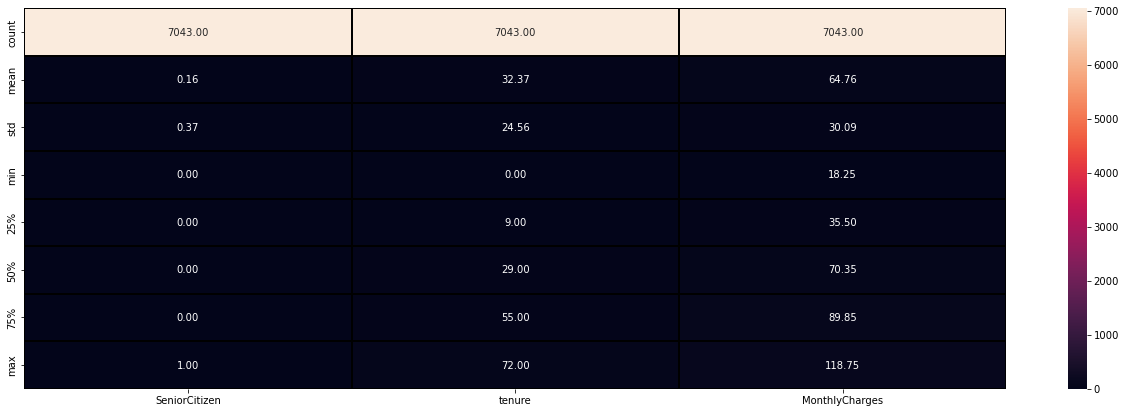

In [9]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [11]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [12]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

Above we have replaced null values and then converted all float to string, now we will check correlation and individual column data distribution

In [13]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


<AxesSubplot:>

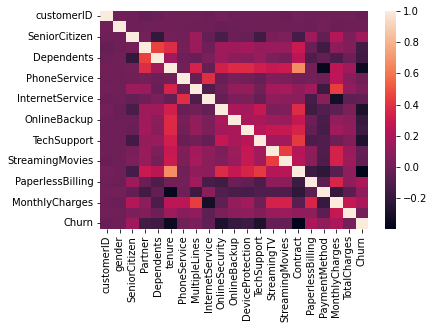

In [14]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [15]:
dfcorr["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

From the above checks using correlation ,we will drop 'MultipleLines','TotalCharges','PhoneService','gender','customerID','StreamingTV','StreamingMovies','InternetService' due to very low corelation

In [16]:
df1=df.drop(['MultipleLines','TotalCharges','PhoneService','gender','customerID','StreamingTV','StreamingMovies','InternetService'],axis=1)
df1

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1.0,0.0,1,0.0,2.0,0.0,0.0,0.0,1.0,2.0,29.85,0.0
1,0,0.0,0.0,34,2.0,0.0,2.0,0.0,1.0,0.0,3.0,56.95,0.0
2,0,0.0,0.0,2,2.0,2.0,0.0,0.0,0.0,1.0,3.0,53.85,1.0
3,0,0.0,0.0,45,2.0,0.0,2.0,2.0,1.0,0.0,0.0,42.30,0.0
4,0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,2.0,0.0,2.0,2.0,1.0,1.0,3.0,84.80,0.0
7039,0,1.0,1.0,72,0.0,2.0,2.0,0.0,1.0,1.0,1.0,103.20,0.0
7040,0,1.0,1.0,11,2.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,0.0
7041,1,1.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,1.0


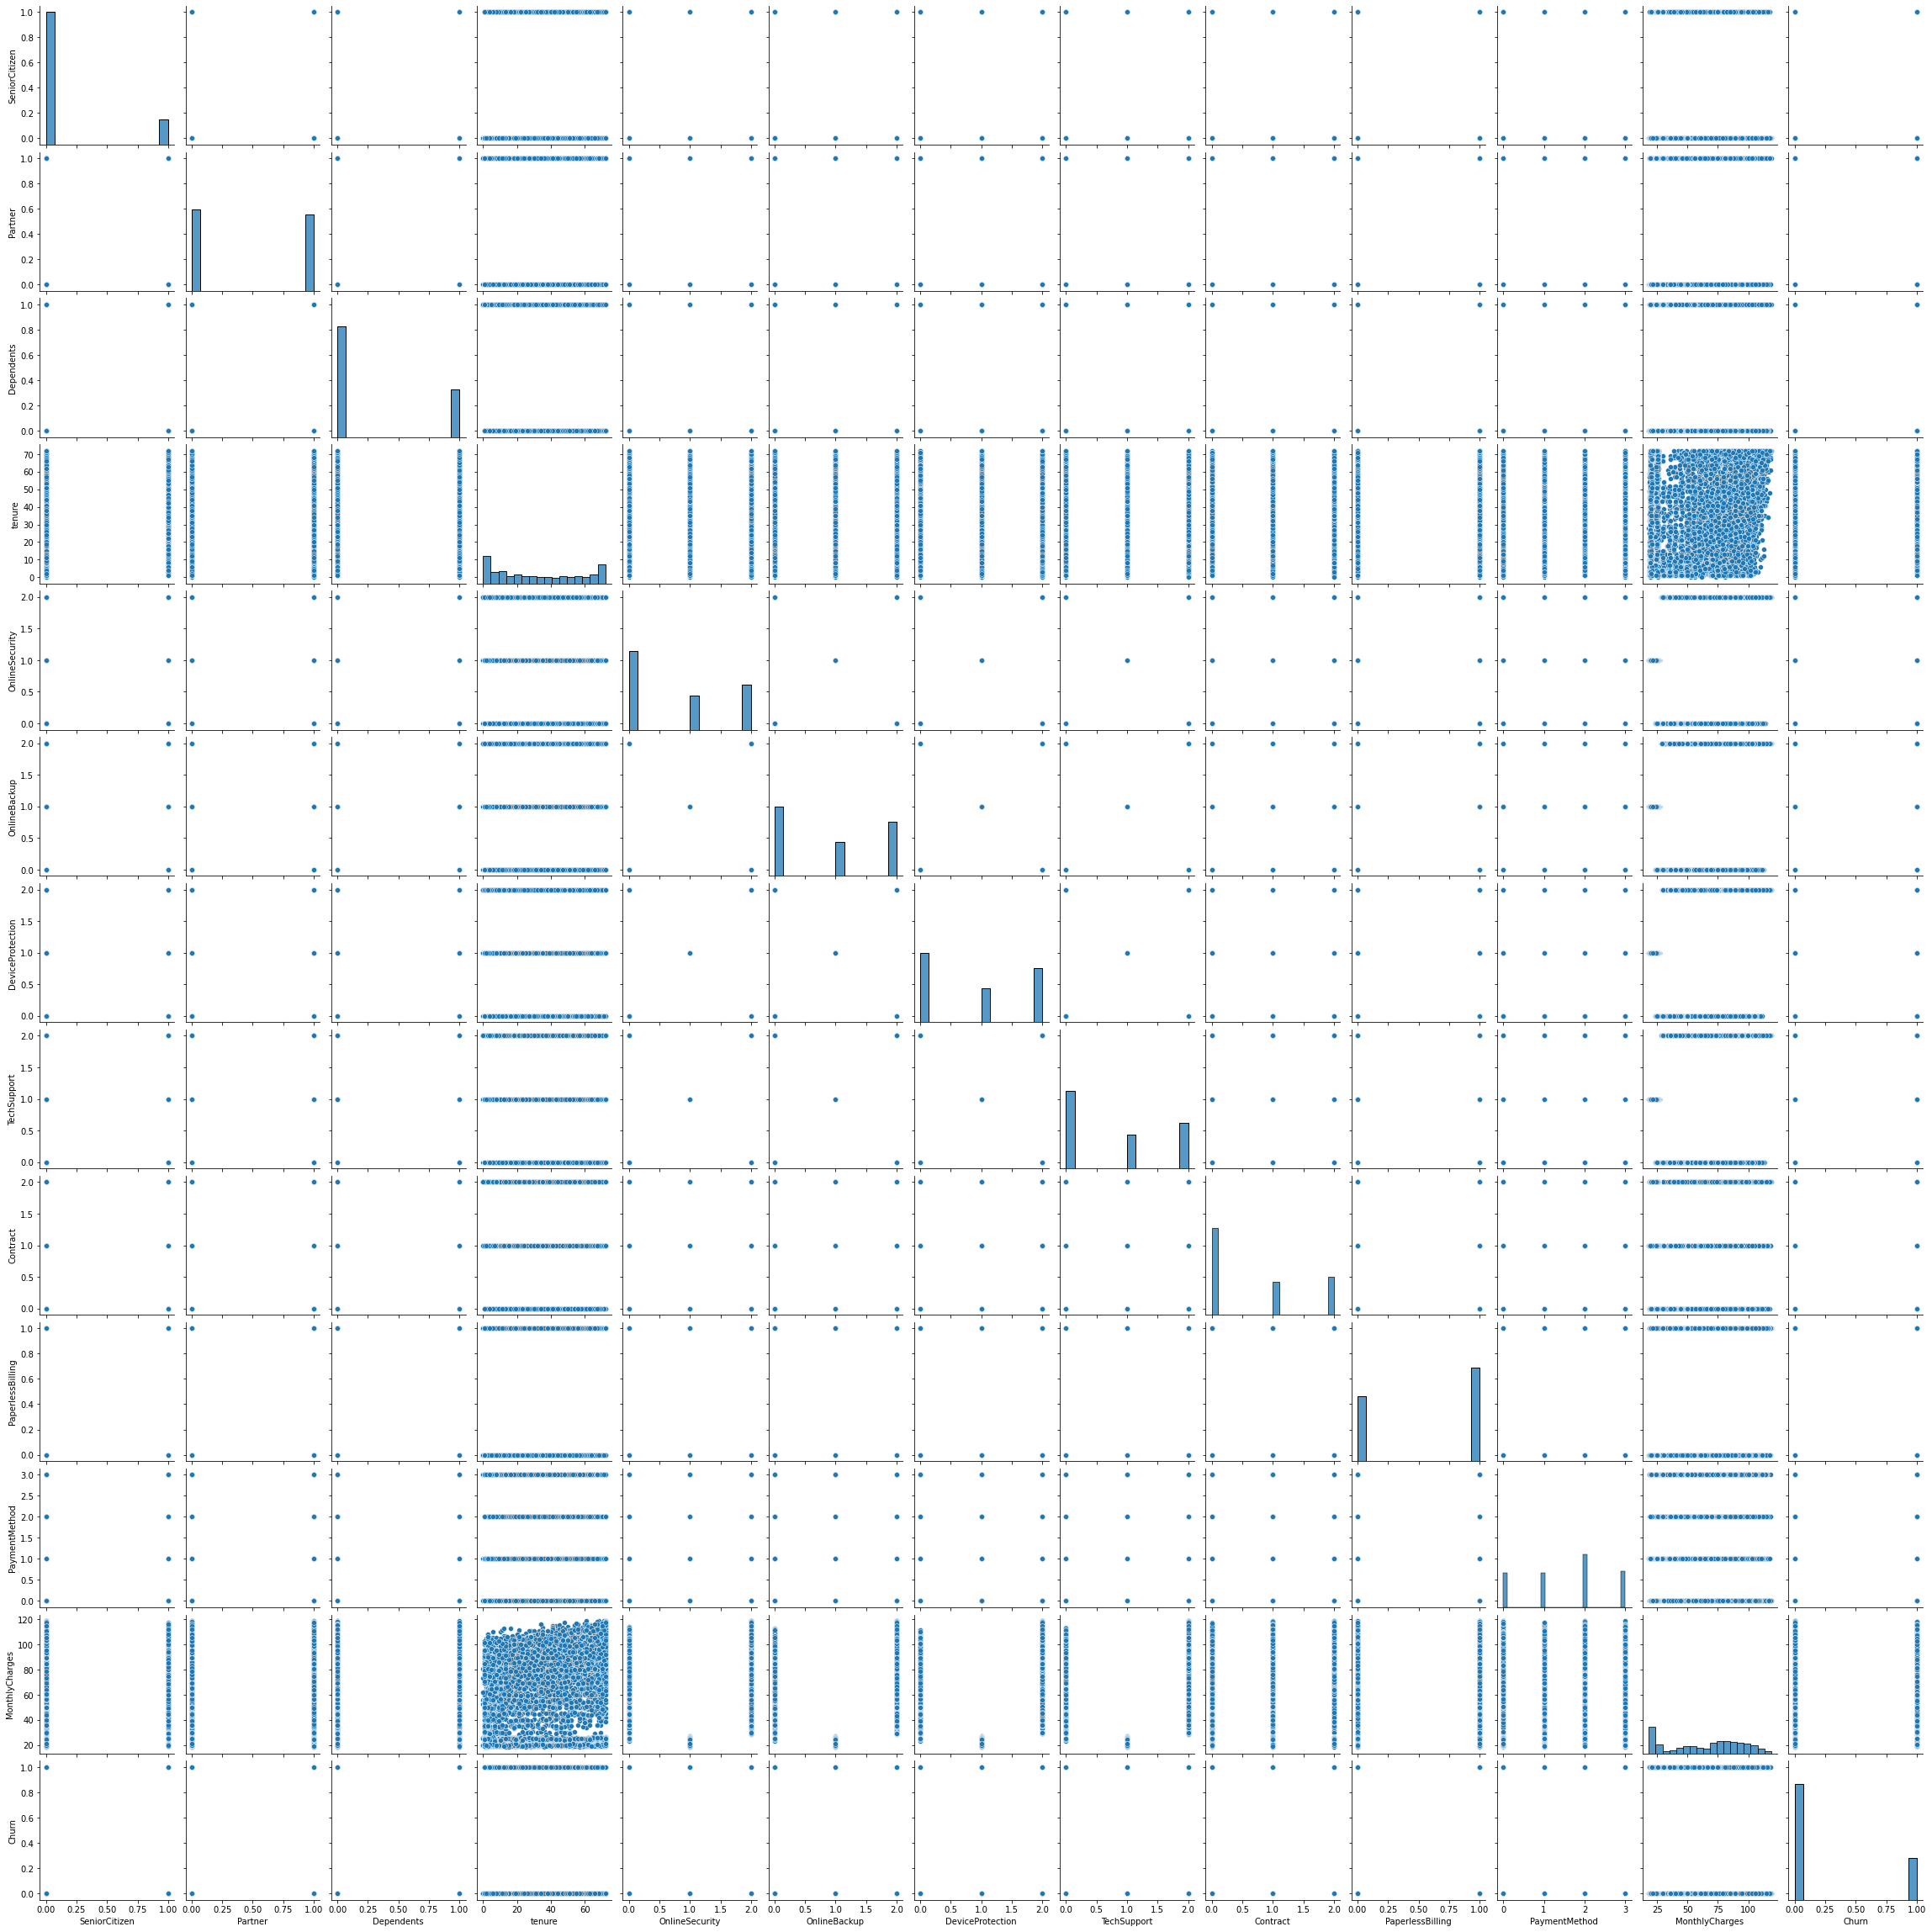

In [17]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

In [18]:
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

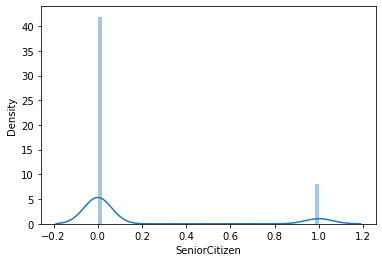

In [19]:
#we will check the data distribution using distplots
sns.distplot(df1['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

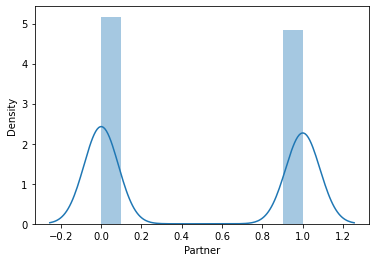

In [20]:
sns.distplot(df1['Partner'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

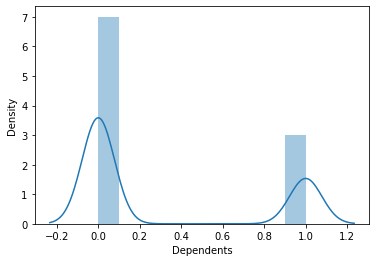

In [21]:
sns.distplot(df1['Dependents'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

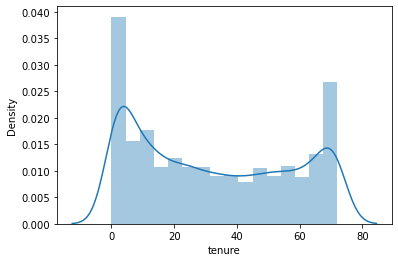

In [22]:
sns.distplot(df1['tenure'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

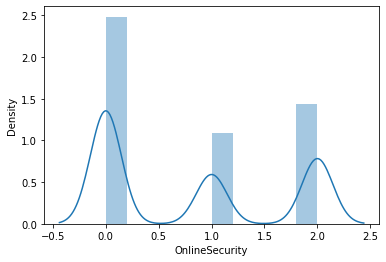

In [23]:
sns.distplot(df1['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

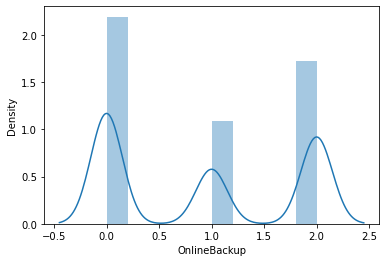

In [24]:
sns.distplot(df1['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

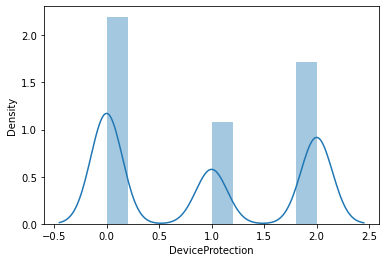

In [25]:
sns.distplot(df1['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

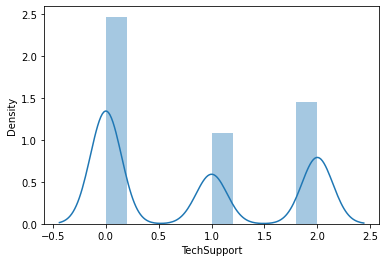

In [26]:
sns.distplot(df1['TechSupport'])

<AxesSubplot:xlabel='Contract', ylabel='Density'>

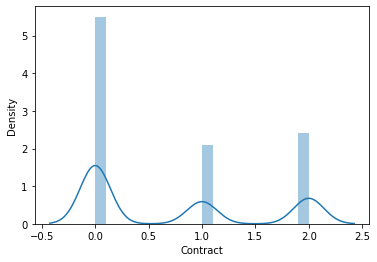

In [27]:
sns.distplot(df1['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

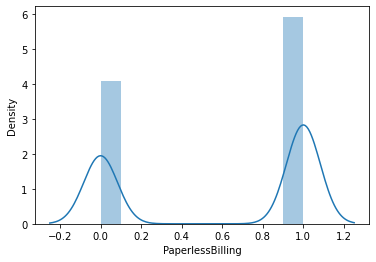

In [28]:
sns.distplot(df1['PaperlessBilling'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='Density'>

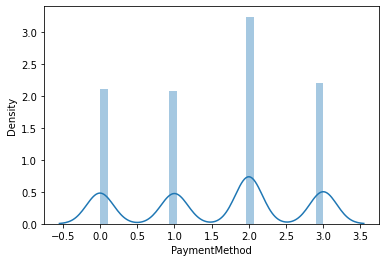

In [29]:
sns.distplot(df1['PaymentMethod'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

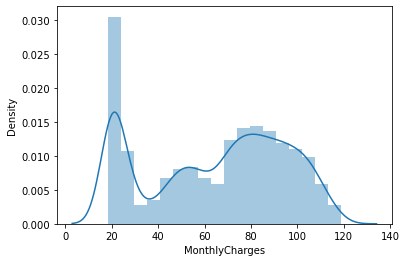

In [30]:
sns.distplot(df1['MonthlyCharges'])

<AxesSubplot:xlabel='Churn', ylabel='Density'>

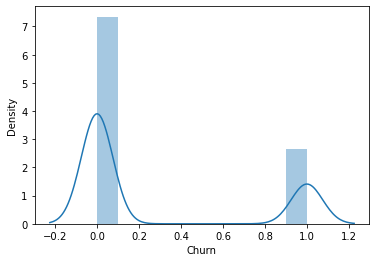

In [31]:
sns.distplot(df1['Churn'])

SeniorCitizen          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Partner             AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Dependents          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
tenure              AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
OnlineSecurity      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
OnlineBackup        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
DeviceProtection    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
TechSupport               AxesSubplot(0.125,0.125;0.0945122x0.343182)
Contract               AxesSubplot(0.238415,0.125;0.0945122x0.343182)
PaperlessBilling       AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PaymentMethod          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
MonthlyCharges         AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Churn                  AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

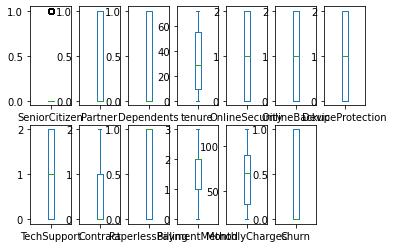

In [32]:
df1.plot(kind='box',subplots=True,layout=(2,7))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

As we have outliers in the data so we need to remove outliers first

In [33]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.439916,1.034530,0.654012,1.277445,0.918838,1.242550,1.027910,0.925262,0.828207,0.829798,0.398558,1.160323,0.601023
1,0.439916,0.966622,0.654012,0.066327,1.407321,1.029919,1.245111,0.925262,0.371271,1.205113,1.334863,0.259629,0.601023
2,0.439916,0.966622,0.654012,1.236724,1.407321,1.242550,1.027910,0.925262,0.828207,0.829798,1.334863,0.362660,1.663829
3,0.439916,0.966622,0.654012,0.514251,1.407321,1.029919,1.245111,1.396299,0.371271,1.205113,1.474052,0.746535,0.601023
4,0.439916,0.966622,0.654012,1.236724,0.918838,1.029919,1.027910,0.925262,0.828207,0.829798,0.398558,0.197365,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.439916,1.034530,1.529024,0.340876,1.407321,1.029919,1.245111,1.396299,0.371271,0.829798,1.334863,0.665992,0.601023
7039,0.439916,1.034530,1.529024,1.613701,0.918838,1.242550,1.245111,0.925262,0.371271,0.829798,0.537747,1.277533,0.601023
7040,0.439916,1.034530,1.529024,0.870241,1.407321,1.029919,1.027910,0.925262,0.828207,0.829798,0.398558,1.168632,0.601023
7041,2.273159,1.034530,0.654012,1.155283,0.918838,1.029919,1.027910,0.925262,0.828207,0.829798,1.334863,0.320338,1.663829


In [34]:
z=np.abs(zscore(df1))

In [35]:
z.shape

(7043, 13)

In [36]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [37]:
len(np.where(z>3)[0])

0

In [38]:
df2=df1[(z<3).all(axis=1)]

In [39]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (7043, 13)
new dataframe (7043, 13)
total dropped 0


In [40]:
#we will now check skewness in data
df2.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

In [41]:
# We will break data into input and output and then remove skewness
x=df2.drop("Churn",axis=1)
y=df2["Churn"]

In [42]:
x

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1.0,0.0,1,0.0,2.0,0.0,0.0,0.0,1.0,2.0,29.85
1,0,0.0,0.0,34,2.0,0.0,2.0,0.0,1.0,0.0,3.0,56.95
2,0,0.0,0.0,2,2.0,2.0,0.0,0.0,0.0,1.0,3.0,53.85
3,0,0.0,0.0,45,2.0,0.0,2.0,2.0,1.0,0.0,0.0,42.30
4,0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,2.0,0.0,2.0,2.0,1.0,1.0,3.0,84.80
7039,0,1.0,1.0,72,0.0,2.0,2.0,0.0,1.0,1.0,1.0,103.20
7040,0,1.0,1.0,11,2.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60
7041,1,1.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40


In [43]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [44]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,SeniorCitizen,1.353859
1,Partner,2.814715
2,Dependents,1.933309
3,tenure,7.111939
4,OnlineSecurity,2.210507
5,OnlineBackup,2.406902
6,DeviceProtection,2.511329
7,TechSupport,2.345669
8,Contract,4.003297
9,PaperlessBilling,2.792587


We will drop OnlineBackup to remove multicollinierity as they have very close VIF with Coapplicant Income

In [45]:
x1=x.drop(['OnlineBackup'],axis=1)
x1

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,2.0,29.85
1,0,0.0,0.0,34,2.0,2.0,0.0,1.0,0.0,3.0,56.95
2,0,0.0,0.0,2,2.0,0.0,0.0,0.0,1.0,3.0,53.85
3,0,0.0,0.0,45,2.0,2.0,2.0,1.0,0.0,0.0,42.30
4,0,0.0,0.0,2,0.0,0.0,0.0,0.0,1.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,2.0,2.0,2.0,1.0,1.0,3.0,84.80
7039,0,1.0,1.0,72,0.0,2.0,0.0,1.0,1.0,1.0,103.20
7040,0,1.0,1.0,11,2.0,0.0,0.0,0.0,1.0,2.0,29.60
7041,1,1.0,0.0,4,0.0,0.0,0.0,0.0,1.0,3.0,74.40


In [46]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [47]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0     1.833633
1     0.067922
2     0.875199
3    -0.243325
4     0.149362
5     0.001051
6     0.139751
7     0.302174
8    -0.375396
9    -0.207559
10   -0.259035
dtype: float64

In [48]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x2=st.fit_transform(x2)
x2

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.8297975 ,
         0.40968472, -1.1585412 ],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.20511329,
         1.31889872, -0.23949171],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
         1.31889872, -0.34266505],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.8297975 ,
         0.40968472, -1.16724064],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  0.8297975 ,
         1.31889872,  0.33431207],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
        -1.48983732,  1.33886338]])

Now we have our input and output ready to be tested for model , As our output is Binary , we will test with Logistic Regression

In [49]:
lr=LogisticRegression()

In [50]:
#finding best random state

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=i)
    lr.fit(x2_train,y_train)
    predlr=lr.predict(x2_test)
    acc=accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

accuracy 0.8105039034776437 random_state 1
accuracy 0.8034066713981547 random_state 2
accuracy 0.8119233498935415 random_state 3
accuracy 0.7906316536550745 random_state 4
accuracy 0.8005677785663591 random_state 5
accuracy 0.8105039034776437 random_state 6
accuracy 0.8126330731014905 random_state 7
accuracy 0.7906316536550745 random_state 8
accuracy 0.7955997161107168 random_state 9
accuracy 0.8069552874378992 random_state 10
accuracy 0.8062455642299503 random_state 11
accuracy 0.8019872249822569 random_state 12
accuracy 0.8105039034776437 random_state 13
accuracy 0.8183108587650816 random_state 14
accuracy 0.8048261178140526 random_state 15
accuracy 0.801277501774308 random_state 16
accuracy 0.8026969481902059 random_state 17
accuracy 0.8225691980127751 random_state 18
accuracy 0.8069552874378992 random_state 19
accuracy 0.8261178140525195 random_state 20
accuracy 0.794180269694819 random_state 21
accuracy 0.7778566359119943 random_state 22
accuracy 0.7955997161107168 random_state 23

accuracy 0.8062455642299503 random_state 195
accuracy 0.7764371894960965 random_state 196
accuracy 0.7984386089425124 random_state 197
accuracy 0.8126330731014905 random_state 198
accuracy 0.7963094393186657 random_state 199
Best Accuracy is 0.8261178140525195 on Random State 20


In [51]:
#Applying the above parameters to Logistic Regression 
lr=LogisticRegression()
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=20)
lr.fit(x2_train,y_train)
predlr=lr.predict(x2_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
cvscore=cross_val_score(lr,x2,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.8261178140525195
[[956 107]
 [138 208]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1063
         1.0       0.66      0.60      0.63       346

    accuracy                           0.83      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409

cross val score: 0.8007959182850506


In [52]:
#Lets try with RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfs=RandomForestClassifier(n_estimators=100,random_state=4)
rfs.fit(x2_train,y_train)
predrfs=rfs.predict(x2_test)
print(accuracy_score(y_test,predrfs))
print(confusion_matrix(y_test,predrfs))
print(classification_report(y_test,predrfs))
cvscore1=cross_val_score(rfs,x2,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.7955997161107168
[[944 119]
 [169 177]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1063
         1.0       0.60      0.51      0.55       346

    accuracy                           0.80      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

cross val score: 0.7841837578230855


In [53]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train,y_train)
knn.score(x2_train,y_train)
predknn=knn.predict(x2_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
cvscore2=cross_val_score(knn,x2,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.7757274662881476
[[923 140]
 [176 170]]
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1063
         1.0       0.55      0.49      0.52       346

    accuracy                           0.78      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

cross val score: 0.7633116451061358


In [64]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x2_train,y_train)
svc.score(x2_train,y_train)
predsvc=svc.predict(x2_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
cvscore3=cross_val_score(svc,x2,y,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.815471965933286
[[966  97]
 [163 183]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1063
         1.0       0.65      0.53      0.58       346

    accuracy                           0.82      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.81      0.82      0.81      1409

cross val score: 0.7956858103748629


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x2_train,y_train)
dtc.score(x2_train,y_train)
preddtc=dtc.predict(x2_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
cvscore4=cross_val_score(dtc,x2,y,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.7437899219304471
[[855 208]
 [153 193]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83      1063
         1.0       0.48      0.56      0.52       346

    accuracy                           0.74      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.76      0.74      0.75      1409

cross val score: 0.7282410357119814


In [56]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x2_train,y_train)
ad_pred=ad.predict(x2_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))
cvscore5=cross_val_score(ad,x2,y,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.8218594748048261
[[950 113]
 [138 208]]
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1063
         1.0       0.65      0.60      0.62       346

    accuracy                           0.82      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.82      0.82      0.82      1409

cross val score: 0.802640190496161


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x2_train,y_train)
gb_pred=gb.predict(x2_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
cvscore6=cross_val_score(gb,x2,y,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.8197303051809794
[[961 102]
 [152 194]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1063
         1.0       0.66      0.56      0.60       346

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409

cross val score: 0.801788623459578


Hypertuning below for the algorithm selected as Random Forest Classifier

In [58]:
RandomForestClassifier()

RandomForestClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [60]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x2_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [61]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [62]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2')

In [63]:
GCV_pred=GCV.best_estimator_.predict(x2_test)
accuracy_score(y_test,GCV_pred)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))
cvscore7=cross_val_score(GCV.best_estimator_,x2,y,cv=5)
cvm7=cvscore7.mean()
print("cross val score:",cvm7)

0.7977288857345636
[[939 124]
 [161 185]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1063
         1.0       0.60      0.53      0.56       346

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

cross val score: 0.7823372677269502


Logistic Regression comes with 82% accuracy score , 83% accuracy in F1 Score and 80 % Cross Val Score

RandomForestClassifier 79% accuracy score ,80 % accuracy in F1 score and 78 % Cross Val score

KNeighborsClassifier 77 % accuracy , 78 % accuracy in F1 score and 76 % Cross Val score

support vector classifier using kernel as rbf 81 % accuracy , 82 % accuracy in F1 score and 79 % Cross Val score

DecisionTreeClassifier 74% accuracy , 74 % accuracy in F1 score and 72 % Cross Val score

AdaBoostClassifier 82 % accuracy , 82 % accuracy in F1 score and 80 % Cross Val score

GradientBoostingClassifier 81 % accuracy , 82 % accuracy in F1 score and 80 % Cross Val score

By doing Hypertuning using RandomForestClassifier with best param 79 % accuracy , 80 % accuracy in F1 score and 78 % Cross Val score

We select AdaBoostClassifier 82 % accuracy , 82 % accuracy in F1 score and 80 % Cross Val score


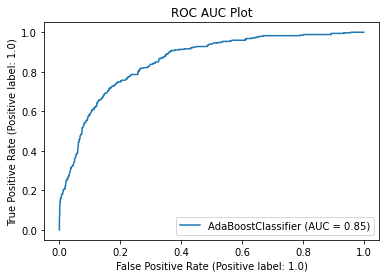

In [65]:
#Lets plot AUC ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ad,x2_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [66]:
#we will save this model
import pickle

In [67]:
filename='churn.pkl'
pickle.dump(ad,open(filename,'wb'))

In [68]:
#Conclusion 
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x2_test,y_test)
print(result)
                        

0.8218594748048261


In [69]:
#predicting the rain tomorrow using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x2_test)[:],ad_pred[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Original,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
